<a href="https://colab.research.google.com/github/Argarm/FSI/blob/master/RedNeuronalSinTFoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


from sklearn.datasets import make_circles

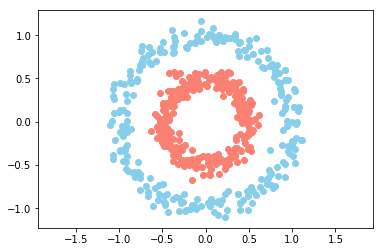

In [3]:
#Creamos nuestro dataset

n=500 #Numero de registros que vamos a tratar
p=2   #Numero de propiedades a tratar

# El parametro fractor lo que hace es fijar la distancia entre los dos circulos
# Mayor el parametro menor la distancia
X,Y = make_circles(n_samples = n,factor=0.5,noise=0.07)
Y= Y[:,np.newaxis]
# En Y guardamos a que clase pertenece cada punto, poniendo la mascara correspondiente (0 o 1) podemos saber a cual pertence
# Podemos ver como tenemos cada clase diferenciada por un color distinto esto es posible mediante el uso de mascaras

plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='skyblue')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')
plt.axis('equal')
plt.show()


##Definicion de la capa de neuronas

Ahora especificaremos una clase que nos hará de capa de procesamiento, para ello a nuestra capa le tenemos que especificar el numero de conexiones que tiene (no_conn), el numero de neuronas que va a contener (no_neur) y la funcion de activacion (act_fn)

In [0]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  
  def __init__(self,no_conn,no_neur,act_fn):
    self.act_fn=act_fn
    self.b = np.random.rand(1,no_neur)        *2-1
    self.w = np.random.rand(no_conn,no_neur)  *2-1
    
    

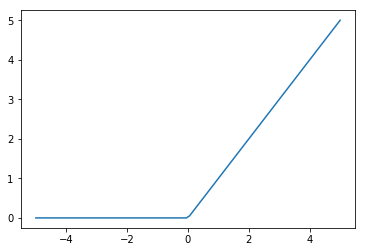

In [5]:
# FUNCIONES DE ACTIVACION

sig = (lambda x: 1/(1+np.e**(-x)),
       lambda x: x*(1-x))


relu = lambda x: np.maximum(0,x)

_x=np.linspace(-5,5,100)
plt.plot(_x,relu(_x))
plt.show()

In [0]:
#RED NEURONAL


# l0 = neural_layer(p,4,sig)
# l1 = neural_layer(4,8,sig)



def create_nn(topology,act_fn):
  nn=[]
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_fn))
    
  return nn



In [7]:
topology=[p,4,8,1]



l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr)**2),
          lambda Yp,Yr: (Yp-Yr))

def train(neural_net,X,Y,l2_cost,lr,train=True):
  #Forward pass
  out=[(None,X)]
  for l,layer in enumerate(neural_net):
    #Z es la suma ponderada de los pesos
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    #A es el resultado de pasar Z por la funcion de activacion
    a = neural_net[l].act_fn[0](z)
    out.append((z,a))
    
  
  if train:
    #Backward pass
    delta = []
    
    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      
      
      if l==len(neural_net)-1:
        #Calcular delta ultima capa
        delta.insert(0,l2_cost[1](a,Y)* neural_net[l].act_fn[1](a))  
      else:
        #Calcular delta respecto a capa previa
        delta.insert(0,delta[0] @ _w.T * neural_net[l].act_fn[1](a))  
      
      _w=neural_net[l].w
      
      #Gradient descent
      neural_net[l].b =neural_net[l].b - np.mean(delta[0], axis=0,keepdims=True)*lr
      neural_net[l].w =neural_net[l].w - out[l][1].T @ delta[0]*lr
      
      
  return out[-1][1]     
      
  

print("")

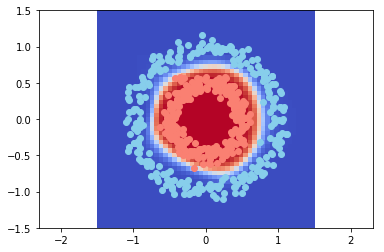

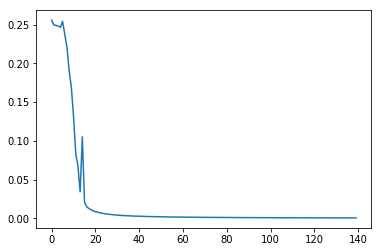

In [8]:
import time
from IPython.display import clear_output

neural_net=create_nn(topology,sig)
loss=[]

for i in range(3500):
  pY=train(neural_net,X,Y,l2_cost,lr=0.04)
  
  if i%25==0:
    loss.append(l2_cost[0](pY,Y))
    res=50
    _x0=np.linspace(-1.5,1.5,res)
    _x1=np.linspace(-1.5,1.5,res)

    _Y = np.zeros((res,res))

    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[i0,i1]= train(neural_net,np.array([[x0,x1]]),Y,l2_cost,0.04,train=False)[0][0]

    plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='skyblue')
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)